# Route Estimator
This software is to help predict the most energy optimized path between two destinations. The default method for computing shortest path can be changed in the `config.py`. The current example edge weight is based on length to show functionality of the markers. There are two provided models that can be applied to the graph to compute an energy consumption estimate. The weight mode can then be changed accordingly.

In [1]:
import sys
sys.path.append("route_estimator")
sys.path.append("route_estimator/models")
sys.path.append("route_estimator/weather")
sys.path.append("route_estimator/traffic")
sys.path.append("range_estimator")
from route_estimator import RouteEstimator
from range_estimator import RangeEstimator
from config import Config

 To get started you will need an instance of the RouteEstimator object created with the config file. You will need to setup the config file to include api keys.

In [2]:
route_estimator_length = RouteEstimator(Config())

## Example of the Default Map

In [3]:
route_map = route_estimator_length.create_map()
route_map

Map(center=[41.740563, -111.81391], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

 ## Example of Simple Energy Model
 Requires: Google Maps API Key, Open Weather API Key

In [4]:
route_estimator_simple_model = RouteEstimator(Config(), graph=route_estimator_length.get_graph())
route_estimator_simple_model.activate_energy_model()
route_map_simple_e = route_estimator_simple_model.create_map()
route_map_simple_e

Map(center=[41.740563, -111.81391], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

## Example of Isochrone

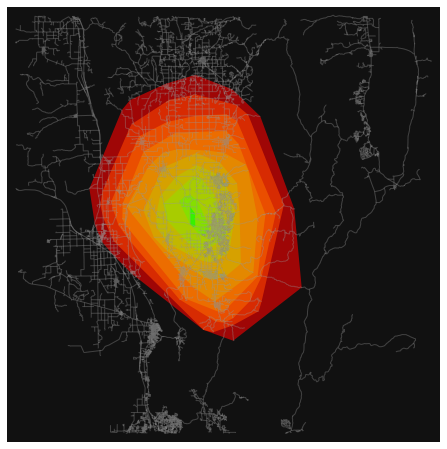

In [5]:
range_estimator_simple_model = RangeEstimator(Config(), route_estimator_simple_model.get_graph())
range_estimator_simple_model.generate_isochrone()

 ## Example of FASTSim Energy Model
 Requires: Google Maps API Key, Open Weather API Key

 Note: FASTSim calculations may take a few minutes

In [6]:
route_estimator_fastsim_model = RouteEstimator(Config("FASTSIM"), graph=route_estimator_length.get_graph())
route_estimator_fastsim_model.activate_energy_model()
route_map_fastsim_e = route_estimator_fastsim_model.create_map()
route_map_fastsim_e

JITing model, please wait...


Map(center=[41.740563, -111.81391], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

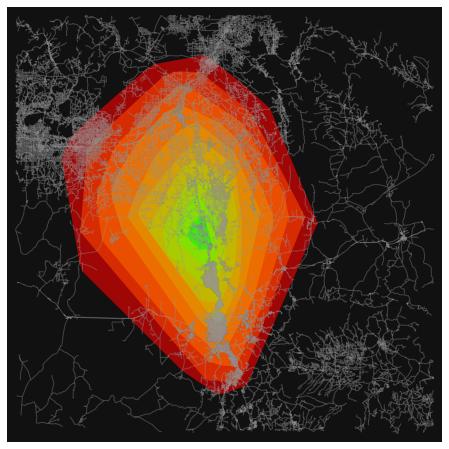

In [7]:
range_estimator_fastsim_model = RangeEstimator(Config("FASTSIM"), route_estimator_fastsim_model.get_graph())
range_estimator_fastsim_model.generate_isochrone()